# 朴素贝叶斯

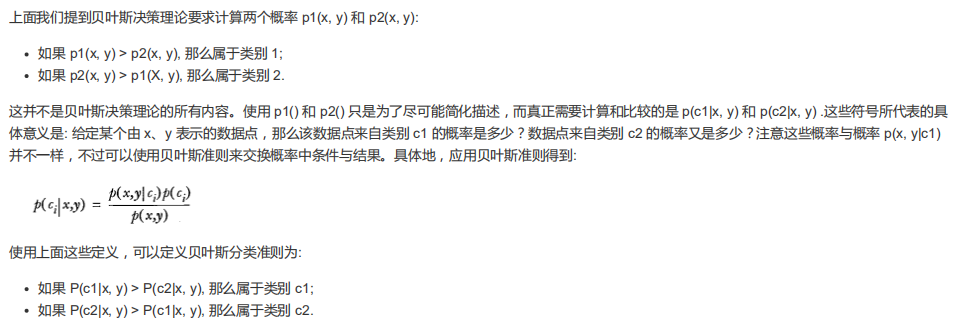

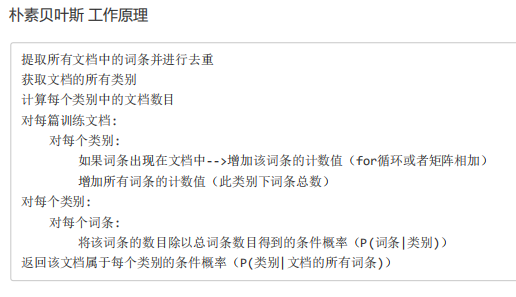

In [20]:
from numpy import *
'''
p(xy)=p(x|y)p(y)=p(y|x)p(x)
p(x|y)=p(y|x)p(x)/p(y)
'''

'\np(xy)=p(x|y)p(y)=p(y|x)p(x)\np(x|y)=p(y|x)p(x)/p(y)\n'

In [21]:
def loadDataSet():
    postingList = [['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'], #[0,0,1,1,1......]
                   ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                   ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                   ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                   ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                   ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
    classVec = [0, 1, 0, 1, 0, 1]
    return postingList, classVec

def creatVocabList(dataSet):
    #set是一个无序且不重复的元素集合。
    vocabSet = set([])
    for document in dataSet:
        vocabSet = vocabSet | set(document)
    #包含文档所有不重复词的列表
    return list(vocabSet)

def setOfWords2Vec(vocabList, inputSet):
    '''
    遍历查看该单词是否出现，出现该单词则将该单词置1
    :param vocabList: 所有单词集合列表
    :param inputSet: 输入数据集
    :return: 匹配列表[0,1,0,1...]，其中 1与0 表示词汇表中的单词是否出现在输入的数据集中
    '''
    #创建一个和词汇表等长的向量，将其元素设置为0
    returnVec = [0]*len(vocabList)#returnvec is [0,0,0...]
    #遍历文档中所有单词
    for word in inputSet:
        if word in vocabList:
            #如果出现了词汇表中的单词，则将输出的文档向量中的对应值设为1
            returnVec[vocabList.index(word)] = 1
            #returnvec is not [0,0,0...]now
        else:
            print "the word:%s is not in my Vocabulary!" %word
    return returnVec
    #最终根据我们的vocablist处理inputset，如果我们的inputset里面有vocablist的关键字，我们就将全为0的vocablist对应的关键词位置设置为1
    #最后返回一个和vocablist一样长的returnvec

#训练算法
def trainNB0(trainMatrix, trainCategory):
    '''
    :param trainMatrix: 文档矩阵
    :param trainCategory: 由每篇文档类别标签构成的向量
    '''
    #文件num
    numTrainDocs = len(trainMatrix)
    #单词num
    numWords = len(trainMatrix[0])
    #对每个类别： 
        #对每个词条：
            #该词条数目/总词条数目
    pAbusive = sum(trainCategory) / float(numTrainDocs)#这里的len matrix 和len category都是一样 最后获得了侮辱文档/总文档
    #对每篇文档：
        #对每个类别：
            #if词条出现在文档中，增加该词条数值
            #增加所有词条数值
    # p0Num 正常的统计
    # p1Num 侮辱的统计 
    p0Num = ones(numWords)
    p1Num = ones(numWords)
    
    # 整个数据集单词出现总数，2.0根据样本/实际调查结果调整分母的值（2主要是避免分母为0，当然值可以调整）
    # p0Denom 正常的统计
    # p1Denom 侮辱的统计
    p0Denom = 2.0
    p1Denom = 2.0
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:
            #累加辱骂词频次
            p1Num += trainMatrix[i]
            # 对每篇文章的辱骂的频次 进行统计汇总
            p1Denom += sum(trainMatrix[i])
        else:
            p0Num += trainMatrix[i]#向量
            p0Denom += sum(trainMatrix[i])#数值
    # 类别1，即侮辱性文档的[log(P(F1|C1)),log(P(F2|C1)),log(P(F3|C1)),log(P(F4|C1)),log(P(F5|C1))....]列表
    p1Vect = log(p1Num / p1Denom)
    # 类别0，即正常文档的[log(P(F1|C0)),log(P(F2|C0)),log(P(F3|C0)),log(P(F4|C0)),log(P(F5|C0))....]列表
    p0Vect = log(p0Num / p0Denom)#向量除以数值，结果是向量，向量中每个元素都除以该数值。
    return p0Vect, p1Vect, pAbusive

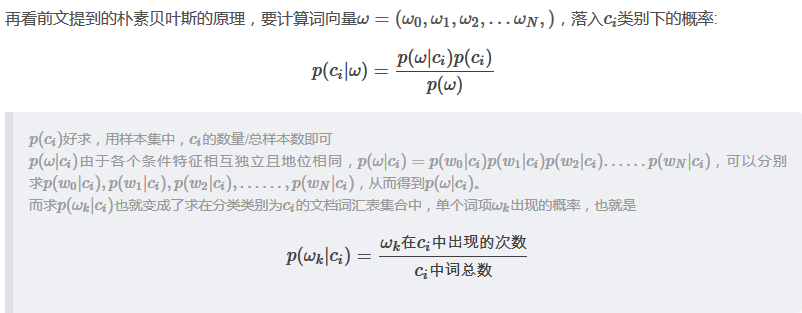

In [22]:
#测试算法
def classifyNB(vec2Classify,p0Vec,p1Vec,pClass1):
    '''
    使用算法：
        # 将乘法转换为加法
        乘法：P(C|F1F2...Fn) = P(F1F2...Fn|C)P(C)/P(F1F2...Fn)
        加法：P(F1|C)*P(F2|C)....P(Fn|C)P(C) -> log(P(F1|C))+log(P(F2|C))+....+log(P(Fn|C))+log(P(C))
    :param vec2Classify: 待测数据[0,1,1,1,1...]，即要分类的向量
    :param p0Vec: 类别0，即正常文档的[log(P(F1|C0)),log(P(F2|C0)),log(P(F3|C0)),log(P(F4|C0)),log(P(F5|C0))....]列表
    :param p1Vec: 类别1，即侮辱性文档的[log(P(F1|C1)),log(P(F2|C1)),log(P(F3|C1)),log(P(F4|C1)),log(P(F5|C1))....]列表
    :param pClass1: 类别1，侮辱性文件的出现概率
    :return: 类别1 or 0
    '''
    p1 = sum(vec2Classify * p1Vec) + log(pClass1)#这里因为是log，所以是+运算。
    p0 = sum(vec2Classify * p0Vec) + log(1.0 - pClass1)
    if p1 > p0:
        return 1
    else:
        return 0

In [23]:
#词袋模型，优化的setofwords2vec
def bagOfWords2VecMN(vocabList, inputSet):
    returnVec = [0] * len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] += 1
    return returnVec

In [32]:
def testingNB():
    """
    测试朴素贝叶斯算法
    """
    # 1. 加载数据集
    listOPosts, listClasses = loadDataSet()
    # 2. 创建单词集合
    myVocabList = creatVocabList(listOPosts)
    # 3. 计算单词是否出现并创建数据矩阵
    trainMat = []
    for postinDoc in listOPosts:
        # 返回m*len(myVocabList)的矩阵， 记录的都是0，1信息
        trainMat.append(bagOfWords2VecMN(myVocabList, postinDoc))
    # 4. 训练数据
    p0V, p1V, pAb = trainNB0(array(trainMat), array(listClasses))
    # 5. 测试数据
    testEntry = ['love', 'my', 'dalmation']
    thisDoc = array(bagOfWords2VecMN(myVocabList, testEntry))#这里使用的是优化的词袋
    print thisDoc
    print '++++++++++++++++++++++++++测试一++++++++++++++++++++++++++++++++'
    print testEntry, 'classified as: ', classifyNB(thisDoc, p0V, p1V, pAb)
    testEntry = ['stupid', 'garbage','stupid','apple']
    thisDoc = array(bagOfWords2VecMN(myVocabList, testEntry))
    print thisDoc
    print '++++++++++++++++++++++++++测试二++++++++++++++++++++++++++++++++'
    print testEntry, 'classified as: ', classifyNB(thisDoc, p0V, p1V, pAb)

In [31]:
testingNB()

[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
++++++++++++++++++++++++++测试一++++++++++++++++++++++++++++++++
['love', 'my', 'dalmation'] classified as:  0
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
++++++++++++++++++++++++++测试二++++++++++++++++++++++++++++++++
['stupid', 'garbage', 'stupid', 'apple'] classified as:  1


# 过滤垃圾邮件

In [78]:
#切分文本
def textParse(bigString):
    import re
    # 使用正则表达式来切分句子，其中分隔符是除单词、数字外的任意字符串
    listOfTokens = re.split(r'\W*',bigString)
    # 只返回 大于2长度的字符串 ，并且把字符串全部转成小写
    return [tok.lower() for tok in listOfTokens if len(tok) > 2]

#对文件夹中文件进行自动处理
def spamTest():
    docList = []
    classList = []
    fullText = []
    for i in range(1, 26):
        # 切分，解析数据，并归类为 1 类别
        wordList = textParse(open('email/spam/%d.txt' % i).read())
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(1)
        # 切分，解析数据，并归类为 0 类别
        wordList = textParse(open('email/ham/%d.txt' % i).read())
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(0)
    #创建词汇表
    vocabList = creatVocabList(docList)
#留存交叉验证
    trainingSet = range(50)
    
    testSet = []
    # 随机取 10 个邮件用来测试 this is测试集【】
    for i in range(10):
        # random.uniform(x, y) 随机生成一个范围为 x - y 的实数
        randIndex = int(random.uniform(0, len(trainingSet)))
        testSet.append(trainingSet[randIndex])
        del(trainingSet[randIndex])#防止重复 del 删除引用而不是删除对象，对象由自动垃圾回收机制删除 
    print '++++++++++++testset+++++++++++++++++'
    print testSet
    print '++++++++++++trainingset+++++++++++++++++'
    print trainingSet
    print '++++++++++++classlist+++++++++++++++++'
    print classList
        
    #this is训练集【】
    trainMat = []
    trainClasses = []
    for docIndex in trainingSet:
        trainMat.append(bagOfWords2VecMN(vocabList, docList[docIndex]))
        trainClasses.append(classList[docIndex])
    p0V, p1V, pSpam = trainNB0(array(trainMat), array(trainClasses))#这里得到了训练出来的值
    
    errorCount = 0
    for docIndex in testSet:
        wordVector = bagOfWords2VecMN(vocabList, docList[docIndex])
        if classifyNB(array(wordVector), p0V, p1V, pSpam) != classList[docIndex]:
            errorCount += 1
    print 'the errorCount is: ', errorCount
    print 'the testSet length is :', len(testSet)
    print 'the error rate is :', float(errorCount)/len(testSet)
    
    return vocabList,p0V,p1V,pSpam

In [79]:
spamTest()

++++++++++++testset+++++++++++++++++
[24, 33, 20, 44, 13, 30, 43, 29, 4, 27]
++++++++++++trainingset+++++++++++++++++
[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 22, 23, 25, 26, 28, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 47, 48, 49]
++++++++++++classlist+++++++++++++++++
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
the errorCount is:  1
the testSet length is : 10
the error rate is : 0.1


(['all',
  'code',
  'chinese',
  'focus',
  'narcotic',
  'supplement',
  'follow',
  '14th',
  'issues',
  'increase',
  'glimpse',
  'foaming',
  'father',
  'program',
  'sorry',
  'insights',
  'sent',
  '50mg',
  'risk',
  'far',
  'of_penisen1argement',
  'wallets',
  'fractal',
  'tickets',
  'school',
  'doggy',
  'level',
  'louis',
  'having',
  'upload',
  'ryan',
  'try',
  'item',
  'team',
  'guy',
  '292',
  'commented',
  '291',
  'enjoy',
  'advocate',
  'talked',
  '199',
  'concise',
  '195',
  'horn',
  'past',
  'titles',
  'design',
  'download',
  'carlo',
  'blue',
  'what',
  'assistance',
  'selected',
  'while',
  '0nline',
  'thickness',
  'access',
  'reply',
  'net',
  'viagranoprescription',
  'told',
  'supporting',
  'full',
  'zach',
  'here',
  'hours',
  'let',
  'free',
  'groups',
  'address',
  '100',
  'softwares',
  'great',
  'incoming',
  'forum',
  'canadian',
  'dusty',
  'items',
  'inspired',
  'experience',
  'credit',
  'products',
  's

In [95]:
def testParseTest():
    vocabList,p0V, p1V, pSpam = spamTest()
    textList = textParse(open('email/ham/1.txt').read())
    textWordVector = bagOfWords2VecMN(vocabList,textList)
    print '++++++++++++++++++++textWordVector+++++++++++++++++++++++++'    
    print textWordVector
    print 'classified as:',classifyNB(array(textWordVector), p0V, p1V, pSpam)

In [96]:
testParseTest()

++++++++++++testset+++++++++++++++++
[32, 26, 17, 43, 7, 3, 33, 39, 9, 14]
++++++++++++trainingset+++++++++++++++++
[0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49]
++++++++++++classlist+++++++++++++++++
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
the errorCount is:  1
the testSet length is : 10
the error rate is : 0.1
++++++++++++++++++++textWordVector+++++++++++++++++++++++++
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0

# 为什么使用log？
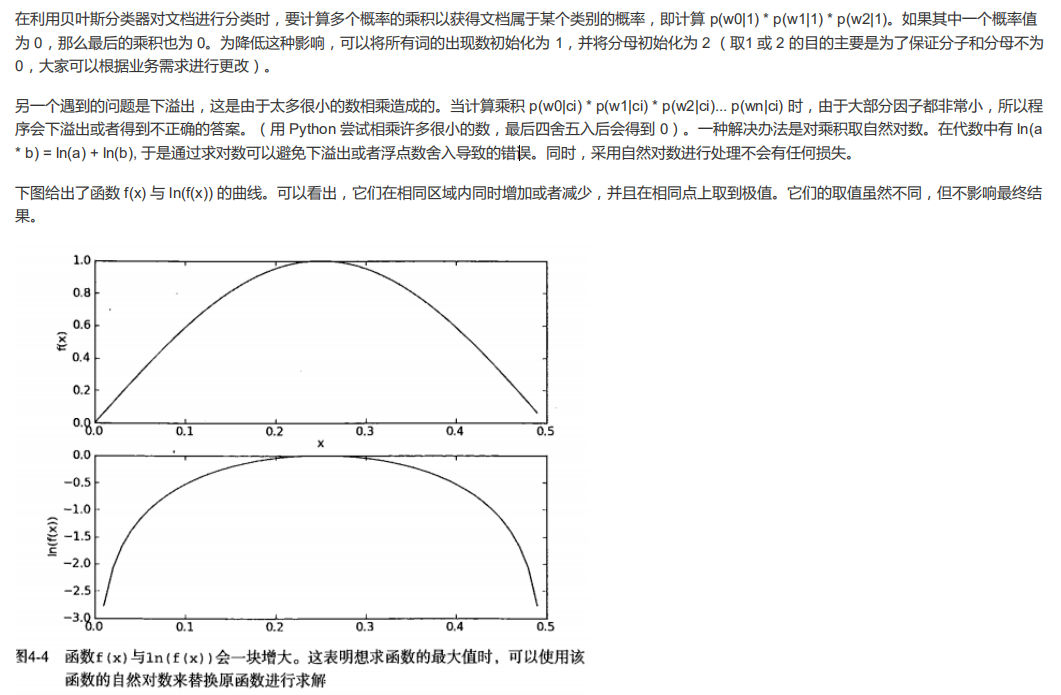

# 使用朴素贝叶斯分类器从个人广告中获取区域倾向

流程

1、收集数据：从RSS源收集内容，这里需要对RSS源构建一个接口

2、准备数据：将文本文件解析成词条向量

3、分析数据：检查词条确保解析的正确性

4、训练算法：使用之前建立的trainNBD()函数

5、使用算法：构建一个完整的程序，封装所有内容。给定两个RSS源，该程序会显示最常用的公共词

目的：通过将不同城市的广告训练成一个分类器，然后观察单词和条件概率来发现与特定城市相关的内容 

In [129]:
'''
这里我们的
# 将文本文件解析成 词条向量
以及
#文件解析
使用之前的 词袋函数以及textParse
'''

#RSS源分类器及高频词去除函数

#选取频率最高的30个词
def calcMostFreq(vocabList,fullText):
    import operator
    freqDict = {}
    for token in vocabList:
        freqDict[token] = fullText.count(token)#遍历每个token的次数
    sortedFreq = sorted(freqDict.iteritems(),key=operator.itemgetter(1),reverse=True)#根据每个词出现的次数从高到底对字典进行排序
    return sortedFreq[:30]

def localWords(feed1,feed0):
    import feedparser
    docList=[];classList=[];fullText=[]
    
    minLen=min(len(feed1['entries']),len(feed0['entries']))
    
    for i in range(minLen):
        wordList=textParse(feed1['entries'][i]['summary'])   #每次访问一条RSS源
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(1)
        wordList=textParse(feed0['entries'][i]['summary'])
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(0)
    #doclist  classlist finished
        
    vocabList=creatVocabList(docList)#去重
    top30Words=calcMostFreq(vocabList,fullText)
    #测试
    for pairW in top30Words:
        if pairW[0] in vocabList:vocabList.remove(pairW[0])    #去掉出现次数最高的那些词
    trainingSet=range(2*minLen);testSet=[]#trainingSet只记录index，最后计算Mat的时候，用dicList[Index]
    for i in range(20):#在训练样本中随机挑选20个做测试样本
        randIndex=int(random.uniform(0,len(trainingSet)))
        testSet.append(trainingSet[randIndex])
        del(trainingSet[randIndex])
    #训练    
    trainMat=[];trainClasses=[]
    for docIndex in trainingSet:
        trainMat.append(bagOfWordsVecMN(vocabList,docList[docIndex]))
        trainClasses.append(classList[docIndex])
    p0V,p1V,pSpam=trainNBD(array(trainMat),array(trainClasses))

    errorCount=0
    for docIndex in testSet:
        wordVector=bagOfWordsVecMN(vocabList,docList[docIndex])
        if classifyNB(array(wordVector),p0V,p1V,pSpam)!=classList[docIndex]:
            errorCount+=1
    print  'the error rate is: ',float(errorCount)/len(testSet)
    return vocabList,p0V,p1V

In [132]:
import feedparser
ny=feedparser.parse('http://newyork.craigslist.org/stp/index.rss') 
sf=feedparser.parse('http://sfbay.craigslist.org/stp/index.rss') 
vocabList,pSF,pNY=localWords(ny,sf)
#这里rss源有问题 有page not found 

IndexError: list index out of range